In [1]:
import pandas as pd
import sys
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


%matplotlib inline

In [2]:
data = pd.read_json('data/log-course2.json')
data.head()


,accept_language,agent,context,event,event_source,event_type,host,ip,name,page,referer,session,time,username
0,"es-ES,es;q=0.9",Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"{'course_user_tags': {}, 'user_id': '', 'org_i...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:UTPL+SARH5+2019_1/about,opencampus.utpl.edu.ec,77.111.247.82,NaN,None,,NaN,2019-04-01T04:28:26.189835+00:00,
1,"es-ES,es;q=0.9",Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"{'course_user_tags': {}, 'user_id': '', 'org_i...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:UTPL+SARH5+2019_1/,opencampus.utpl.edu.ec,77.111.247.82,NaN,None,,NaN,2019-04-01T04:28:27.321273+00:00,
2,"es-ES,es;q=0.8,en-US;q=0.5,en;q=0.3",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,"{'course_user_tags': {}, 'user_id': '', 'org_i...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:UTPL+SARH5+2019_1/about,opencampus.utpl.edu.ec,157.100.56.84,NaN,None,,NaN,2019-04-01T04:36:10.029097+00:00,
3,"es-ES,es;q=0.8,en-US;q=0.5,en;q=0.3",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,"{'user_id': '', 'org_id': '', 'course_id': '',...","{""POST"": {}, ""GET"": {}}",server,/i18n.js,opencampus.utpl.edu.ec,157.100.56.84,NaN,None,http://opencampus.utpl.edu.ec/courses/course-v...,NaN,2019-04-01T04:36:10.637890+00:00,
4,"es-ES,es;q=0.8,en-US;q=0.5,en;q=0.3",Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,"{'user_id': '', 'org_id': '', 'course_id': '',...","{""POST"": {""course_id"": [""course-v1:UTPL+SARH5+...",server,/change_enrollment,opencampus.utpl.edu.ec,157.100.56.84,NaN,None,http://opencampus.utpl.edu.ec/courses/course-v...,NaN,2019-04-01T04:38:47.135982+00:00,


In [3]:
len(data['username'].unique())

1181

In [4]:
dataCopia = data[['username', 'ip']]
dataCopia.head()

,username,ip
0,,77.111.247.82
1,,77.111.247.82
2,,157.100.56.84
3,,157.100.56.84
4,,157.100.56.84


In [5]:
dataCopia = dataCopia[['username', 'ip']].groupby(['username'], as_index=False).count()
dataCopia.sample(25)

,username,ip
385,JulianaAlmeida,27
151,DanielaParedes,88
743,XimenaVillacis,2
571,Nohely_FreireVillacres,5
1058,mayrarojas,7
1,-Fer-,2
295,Henry1990,111
813,bryanmg,5
667,SilvanaPicoV,29
646,Sahadan_1991,5


In [6]:
def agrupar(username):
    if username != "":
        letra = username[0].lower()
        if letra in 'abc':
            return 'A - C'
        elif letra in 'def':
            return 'D - F'
        elif letra in 'ghi':
            return 'G - I'
        elif letra in 'jkl':
            return 'J - L'
        elif letra in 'mnñ':
            return 'M - Ñ'
        elif letra in 'opq':
            return 'O - Q'
        elif letra in 'rst':
            return 'R - T'
        elif letra in 'uvw':
            return 'U - W'
        elif letra in 'xyz':
            return 'X - Z'
        else:
            return 'otros'
    else:
        return 'otros'

In [7]:
dataCopia['username'] = dataCopia['username'].map(lambda x: agrupar(x))
dataCopia.rename(columns={'username': 'rangos', 'ip': 'fr'}, inplace=True)
dataCopia.sample(10)

,rangos,fr
823,A - C,143
471,M - Ñ,27
56,A - C,5
556,M - Ñ,189
123,A - C,5
648,R - T,5
1094,M - Ñ,144
99,A - C,2
227,D - F,7
942,J - L,5


In [12]:
colores = ['#fcecc9', '#fcb0b3', '#f93943', '#7eb2dd', '#445e93', "#f9dbbd", '#fca17d', '#da627d', '#9a348e', '#0d0628']

In [8]:
dataCopia = dataCopia.groupby(['rangos'],as_index=False,sort=True).count()
dataCopia

,rangos,fr
0,A - C,209
1,D - F,180
2,G - I,80
3,J - L,261
4,M - Ñ,177
5,O - Q,59
6,R - T,120
7,U - W,55
8,X - Z,31
9,otros,9


Text(0, 0.5, 'Rangos')

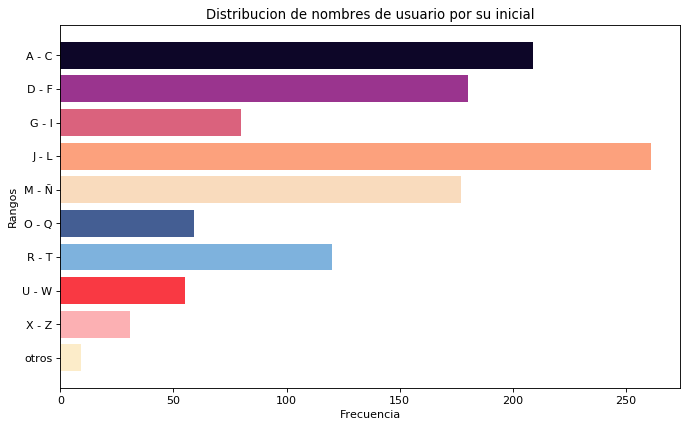

In [19]:
plt.figure(figsize=(10,6), dpi=80)
plt.barh(dataCopia.rangos.values[::-1], dataCopia.fr.values[::-1], color=colores)
plt.title('Distribucion de nombres de usuario por su inicial')
plt.xlabel('Frecuencia')
plt.ylabel('Rangos')
